In [106]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,mean_squared_error,confusion_matrix
from sklearn.tree import DecisionTreeClassifier,export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from matplotlib import pyplot as plt
import time
import matplotlib.gridspec as gridspec
import matplotlib.pylab as pl

In [3]:
dataset = pd.read_csv("/home/auspicious/Downloads/temp1.csv")

In [4]:
x = dataset.iloc[:,[0,1,2,3,4,5,6,7,8,9]].values
y = dataset.iloc[:,[10]].values

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=0)

In [6]:
DT = DecisionTreeClassifier(random_state=0)
RF = RandomForestClassifier()
SV = SVC(kernel='linear')

In [7]:
dtstart = time.time()
DT.fit(x_train,y_train)
dtend = time.time()

In [8]:
rfstart = time.time()
RF.fit(x_train,y_train)
rfend = time.time()

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [9]:
svstart = time.time()
SV.fit(x_train,y_train)
svend = time.time()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
y_dt = DT.predict(x_test)

In [11]:
y_rf = RF.predict(x_test)

In [12]:
y_sv = SV.predict(x_test)

In [13]:
acc_dt = accuracy_score(y_test,y_dt)*100

In [14]:
acc_rf = accuracy_score(y_test,y_rf)*100

In [15]:
acc_sv = accuracy_score(y_test,y_sv)*100

In [16]:
acc_sv

100.0

In [17]:
algo = ['DT','RF','SVM']

In [18]:
accu = [acc_dt,acc_rf,acc_sv]

In [19]:
confusion_matrix(y_sv,y_test)

array([[ 5,  0,  0,  0],
       [ 0,  4,  0,  0],
       [ 0,  0,  7,  0],
       [ 0,  0,  0, 11]])

<BarContainer object of 3 artists>

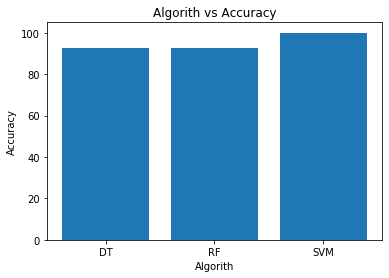

In [20]:
# plt.title("Algorith vs Accuracy")
# plt.xlabel("Algorith")
# plt.ylabel("Accuracy")
# plt.bar(algo,accu)

In [21]:
dttime = dtend-dtstart
rftime = rfend-rfstart
svtime = svend-svstart

In [22]:
algotime = [dttime,rftime,svtime]

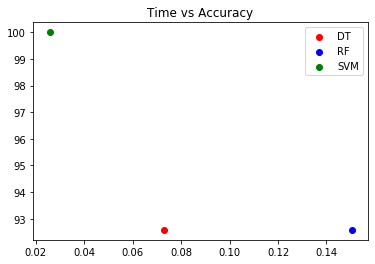

In [23]:
# plt.title("Time vs Accuracy")
# plt.scatter(dttime,acc_dt,color='r',label = 'DT')
# plt.scatter(rftime,acc_rf,color='b',label = 'RF')
# plt.scatter(svtime,acc_sv,color='g',label = 'SVM')
# plt.legend()
# plt.show()

In [24]:
dttime

0.07291245460510254

In [25]:
rftime

0.15064644813537598

In [26]:
svtime

0.02596569061279297

In [28]:
feature = dataset.columns[:9].values

In [29]:
print(feature)

['min1' 'min2' 'min3' 'min4' 'min5' 'min6' 'min7' 'min8' 'min9']


In [30]:
x_test

array([[10, 10, 10, 10, 10, 10, 10, 10, 11, 11],
       [ 9,  9, 10, 10, 10, 11, 11, 11, 11, 12],
       [10, 11, 11, 11, 11, 11, 11, 11, 11, 11],
       [ 8,  8,  8,  8,  8,  8,  8,  8,  9,  9],
       [10, 10, 10, 10, 11, 11, 11, 11, 11, 12],
       [11, 11, 11, 11, 11, 11, 11, 11, 11, 12],
       [ 9,  9,  9, 10, 10, 10, 11, 11, 11, 12],
       [ 9,  9, 10, 10, 10, 10, 11, 11, 11, 12],
       [10, 10, 10, 10, 10, 10, 10, 10, 11, 11],
       [10, 10, 10, 10, 11, 11, 12, 12, 12, 12],
       [ 9,  9,  9, 10, 10, 11, 11, 11, 11, 12],
       [ 9, 10, 10, 10, 10, 10, 11, 11, 11, 11],
       [10, 11, 11, 11, 11, 11, 11, 11, 11, 11],
       [10, 10, 10, 10, 11, 11, 11, 11, 11, 12],
       [ 8,  8,  8,  8,  8,  8,  8,  8,  9,  9],
       [ 9,  9, 10, 10, 10, 10, 11, 11, 12, 12],
       [10, 11, 11, 11, 11, 11, 11, 11, 11, 11],
       [10, 10, 10, 10, 11, 11, 11, 11, 12, 12],
       [ 9,  9, 10, 10, 10, 10, 11, 11, 11, 12],
       [ 9,  9,  9, 10, 10, 10, 11, 11, 11, 11],
       [11, 11, 11, 

In [39]:
timespam = ['15','30','45','60','75','90','105','120','135','150']

In [93]:
temp = dataset.iloc[0,:10]

In [94]:
list(temp)

[8, 8, 8, 8, 8, 8, 8, 8, 8, 9]

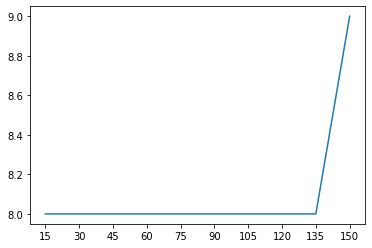

In [95]:
#plt.plot(timespam,temp)

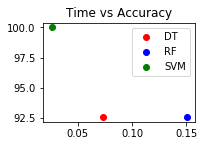

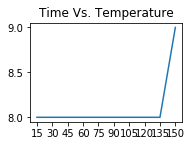

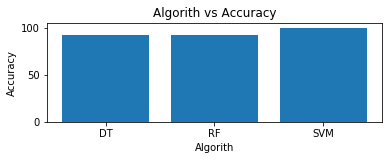

In [108]:
gs = gridspec.GridSpec(2,2)
pl.figure()

ax = pl.subplot(gs[0, 0])
pl.title("Time vs Accuracy")
pl.scatter(dttime,acc_dt,color='r',label = 'DT')
pl.scatter(rftime,acc_rf,color='b',label = 'RF')
pl.scatter(svtime,acc_sv,color='g',label = 'SVM')
pl.legend()
pl.show()

ax = pl.subplot(gs[0, 1])
pl.title("Time Vs. Temperature")
pl.plot(timespam,temp)
pl.show()

ax = pl.subplot(gs[1, :])
pl.title("Algorith vs Accuracy")
pl.xlabel("Algorith")
pl.ylabel("Accuracy")
pl.bar(algo,accu)
pl.show()